**Supervised Learning Algorithm:**

Supervised Learning algorithm provides labelled data to the computer which can be used to train the model to further classify/predict the output.

each training example consists of input(x) and correct output(y).

**KNN- K-Nearest Neighbour**
it is a classic ML techinque which believes that similar data points have similar values/outputs.

it has the training set and testing set , major part of data is used in training so that it does not overfit or underfit the data points.

1.for an input compute the distance from input to training point.
2.select k-nearest neighbours (smallest dist)
3.predict output: Classify(take majority class among neighbours) Regression(take avg of neighbour's values)
4.small K may overfit , large K may underfit


In [115]:
#using heartdisease to practice
import pandas as pd
import numpy as np

df = pd.read_csv("/content/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [116]:
y = df.pop('target')
#df.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [117]:
import sklearn
from sklearn.model_selection import train_test_split
"""
x= input which is independent features
y = labels/target
x_train is the features used for training
x_test is the features used for testing
y_train is the target used for training
y_test is the target used for testing

train_size = 0.8 means 80% goes to traing while 20% is reserved for testing.
random_state=42 , means same data is used every time code is run.
"""
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)
print("x_train: " , x_train.shape)
print("x_test: " , x_test.shape)
print("y_train: " , y_train.shape)
print("y_test: " , y_test.shape)

x_train:  (820, 13)
x_test:  (205, 13)
y_train:  (820,)
y_test:  (205,)


In [118]:
#prediction KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=2)
modelKNN = KNN.fit(x_train,y_train)
predictionKNN = KNN.predict(x_test)
print(predictionKNN)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [119]:
# training accuracy
trackKNN = KNN.score(x_train,y_train)
trainingaccKNN = trackKNN*100
print(trainingaccKNN)

99.63414634146342


In [120]:
# testing accuracy
teacKNN = accuracy_score(y_test,predictionKNN)
testingaccKNN = teacKNN*100
print(testingaccKNN)

95.60975609756098


In [121]:
from sklearn.metrics import accuracy_score

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds) * 100
    print(f"K={k}, Accuracy={acc:.2f}%")


K=1, Accuracy=98.54%
K=2, Accuracy=95.61%
K=3, Accuracy=90.24%
K=4, Accuracy=80.98%
K=5, Accuracy=73.17%
K=6, Accuracy=68.78%
K=7, Accuracy=67.80%
K=8, Accuracy=66.83%
K=9, Accuracy=71.71%
K=10, Accuracy=71.71%


**TASK 1**
Occupancy dataset contains four attributes i-e "Humidity, Light, CO2 and Humidity ratio".

 Apply KNN to find if occupancy is possible or not (0 or 1) based on "Humidity,
Light and Humidity Ratio" only. Train on "Occupancy_train.txt" and Test on
"Occupancy_test.txt". You need to do the following then :

 Run this KNN Algorithm for n_neighbors (K) from 1 to 10. You will get 10
different accuracies. Print all the accuracies. Then print the highest accuracy and
also the value of K at which you got the highest accuracy.

In [122]:
occ_test = pd.read_csv("/content/occupancy_test.txt")
occ_train = pd.read_csv("/content/occupancy_train.txt")

print(occ_test.head(5))
print(occ_train.head(5))

                    date  Temperature  Humidity       Light         CO2  \
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

     HumidityRatio  Occupancy  
140       0.004764          1  
141       0.004773          1  
142       0.004765          1  
143       0.004744          1  
144       0.004767          1  
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.

In [123]:
x_train = occ_train[["Humidity","Light","HumidityRatio"]]
y_train = occ_train["Occupancy"]

x_test = occ_test[["Humidity","Light","HumidityRatio"]]
y_test = occ_test["Occupancy"]

print("x_train: " , x_train.shape)
print("x_test: " , x_test.shape)
print("y_train: " , y_train.shape)
print("y_test: " , y_test.shape)

x_train:  (8143, 3)
x_test:  (2665, 3)
y_train:  (8143,)
y_test:  (2665,)


In [124]:
KNN = KNeighborsClassifier()
model = KNN.fit(x_train,y_train)
pred = KNN.predict(x_test)
trainacc = KNN.score(x_train,y_train)*100
testacc = accuracy_score(y_test,pred)*100

print("training acc: ",trainacc)
print("testing acc: ",testacc)

training acc:  98.91931720496132
testing acc:  95.53470919324579


In [125]:
accuracies = []
for k in range (1,11):
  KNN = KNeighborsClassifier(n_neighbors=k)
  model = KNN.fit(x_train,y_train)
  preds = KNN.predict(x_test)
  acc = accuracy_score(y_test,preds)*100
  #testacc = KNN.score(x_train,y_train)*100
  accuracies.append(acc)
  print(f"\nK={k}, TEST Accuracy={acc:.2f}%")
  #print(f"K={k}, TRAIN Accuracy={testacc:.2f}%")

print("\nHighest acc: ", max(accuracies))
print("Best K:", accuracies.index(max(accuracies)) + 1)




K=1, TEST Accuracy=94.03%

K=2, TEST Accuracy=92.53%

K=3, TEST Accuracy=95.72%

K=4, TEST Accuracy=94.48%

K=5, TEST Accuracy=95.53%

K=6, TEST Accuracy=95.27%

K=7, TEST Accuracy=96.32%

K=8, TEST Accuracy=96.14%

K=9, TEST Accuracy=96.47%

K=10, TEST Accuracy=96.47%

Highest acc:  96.47279549718574
Best K: 9


In [126]:
KNN = KNeighborsClassifier(n_neighbors=9)
model = KNN.fit(x_train,y_train)
pred = KNN.predict(x_test)
trainacc = KNN.score(x_train,y_train)*100
testacc = accuracy_score(y_test,pred)*100
print("training acc: ", trainacc)
print("testing accuracy: ", testacc)

training acc:  98.78423185558148
testing accuracy:  96.47279549718574


**TASK 2 :**

Now instead of using built-in library, write your own code for kNN classifier from
scratch. Run on iris dataset. Use 80/20 split. Print accuracy and confusion matrix at
the end. You must use the following chi squared distance function :

In [127]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

iris = pd.read_csv("/content/iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [128]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

iris = pd.read_csv("/content/iris.csv")
X = iris.drop("variety",axis=1)
Y = iris["variety"]


X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)
def func(x, y):
    return np.sum((x - y) ** 2 / (x + y + 1e-10))

def knn(x_train, y_train, x_test, k=3):
    dist = []
    for i, x_trainpoint in enumerate(x_train):
        calc = func(x_test, x_trainpoint)
        dist.append((calc, y_train[i]))

    dist.sort(key=lambda x: x[0])
    k_neighbor = [label for (_, label) in dist[:k]]
    return max(set(k_neighbor), key=k_neighbor.count)

def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        pred = knn(X_train, y_train, test_point, k)
        predictions.append(pred)
    return np.array(predictions)

y_pred = knn_predict(X_train.values, y_train.values, X_test.values, k=3)

acc = accuracy_score(y_test, y_pred) * 100
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}%")
print("Confusion Matrix:\n", cm)


Accuracy: 100.00%
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Perform EDA

 Check the dataset is balance or not (using target variable “Label”)

 Check whether there is any empty records, categorical feature, duplicate records, if yes
then handle this and give a brief explanation why you have chosen this technique in a
text cell or “jupyter/colab”

 Check the correlation of your dataset and perform feature selection using Pearson
Correlation

 Analyze your dataset and think if feature scaling is required or not? If yes then apply
any scaling technique based on your distribution.

 Split your dataset in training , testing and validation. Train split will be 80% and test will
be 20% . In validation split your training samples will be 70% and validation set will be
30%. Briefly describe why we use validation set in a text cell. Declare Random_state=0

 Apply KNN and check model training and testing accuracy.

 Compare the accuracies by trying different metrics, combine all the training and testing
accuracies of Euclidean, Manhattan etc. to compare their performance. Make a critical
analysis what you have observed and where we have used different metrics?
 Apply KNN and check model training and testing accuracy.


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("/content/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [215]:
df.shape

(1000, 26)

In [218]:
#  Check the dataset is balance or not (using target variable “Label”)
df["Level"].value_counts()

,count
Level,
High,365
Medium,332
Low,303


In [219]:
#Check whether there is any empty records, categorical feature, duplicate records,
#if yes then handle this and give a brief explanation why you have chosen this technique in a text cell or “jupyter/colab”
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [220]:
df.dtypes

,0
index,int64
Patient Id,object
Age,int64
Gender,int64
Air Pollution,int64
Alcohol use,int64
Dust Allergy,int64
OccuPational Hazards,int64
Genetic Risk,int64
chronic Lung Disease,int64


In [221]:
df.duplicated().sum()

np.int64(0)

In [222]:
df=df.drop(columns=['index','Patient Id'])

In [223]:
le = LabelEncoder()
df["Level"] = le.fit_transform(df["Level"])

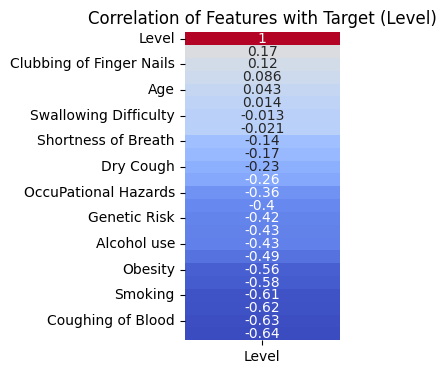

In [224]:
corrMatrix = df.corr(method='pearson')

target_corr = corrMatrix[['Level']].sort_values(by='Level',ascending=False)
plt.figure(figsize=(2,4))
sns.heatmap(target_corr,annot=True,cmap='coolwarm',cbar=False)
plt.title("Correlation of Features with Target (Level)")
plt.show()

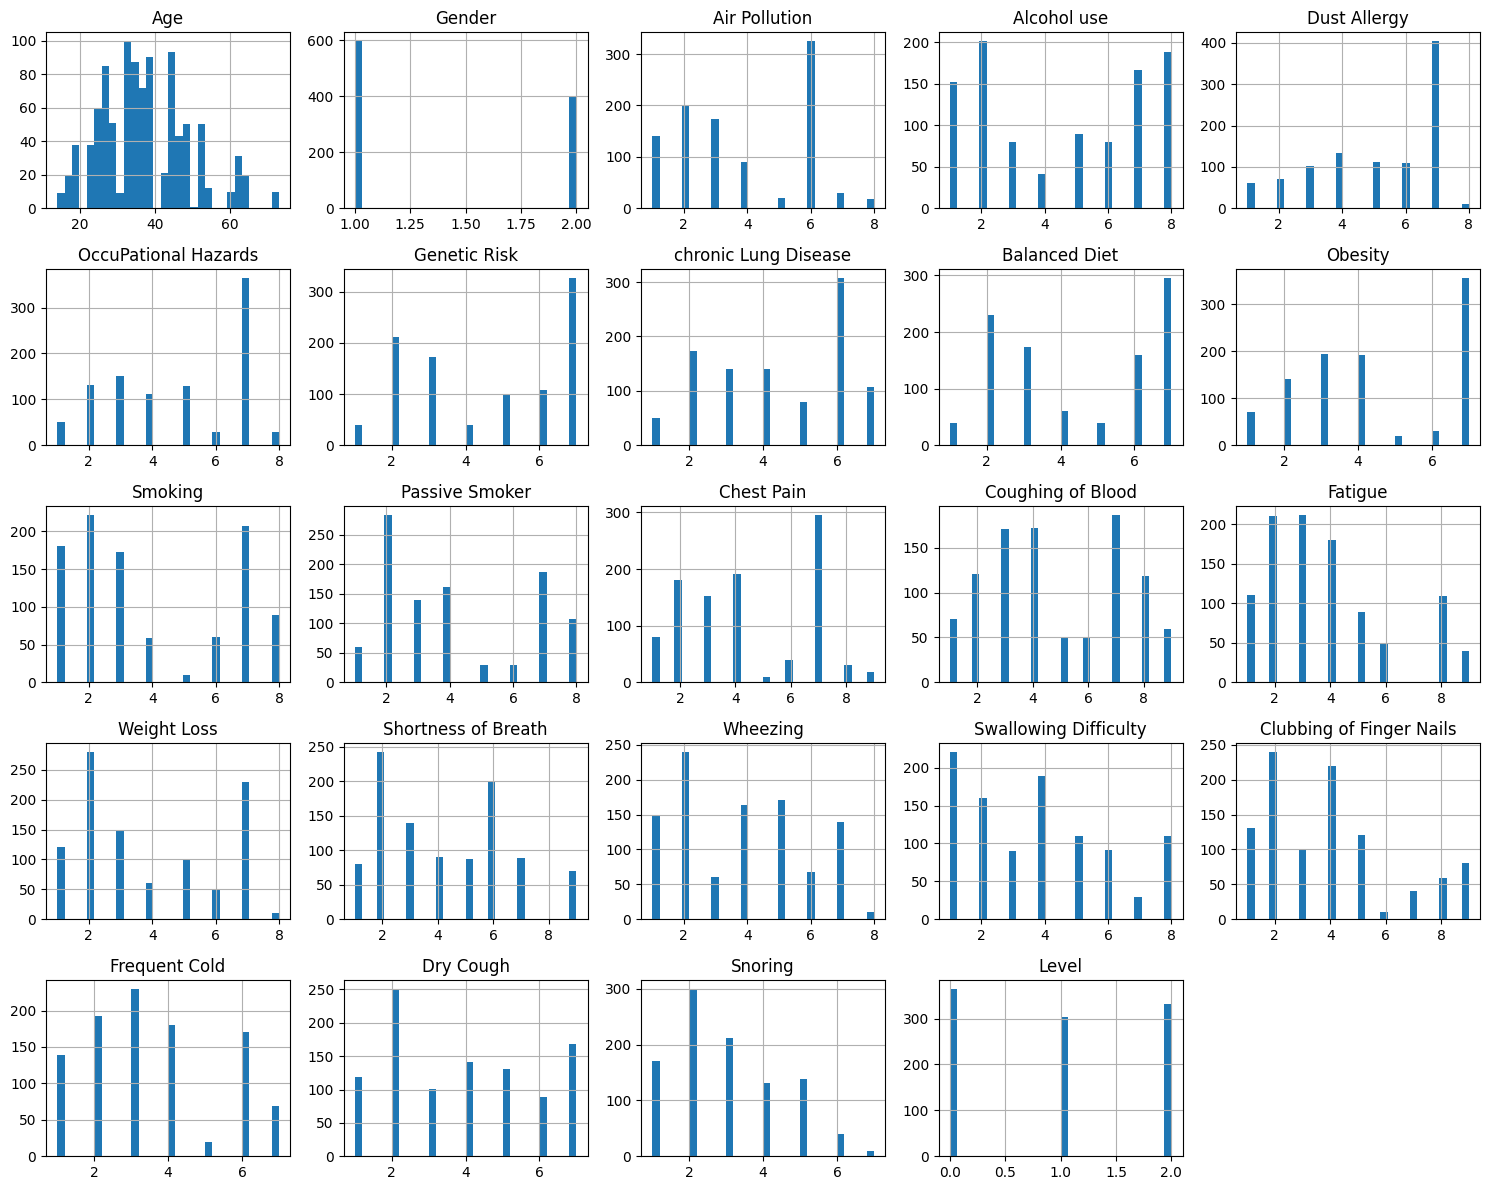

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.96700
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.83463
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.00000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.00000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.00000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.00000


In [226]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()
df.describe()


In [231]:
#Analyze your dataset and think if feature scaling is required or not? If yes then apply any scaling technique based on your distribution.
"""
fetaure scaling required as seen in plots and std,mean,max
"""
scaler = StandardScaler()
X = df.drop("Level",axis=1)
y = df["Level"]
#xScaled = scaler.fit_transform(X)


In [236]:
#Split your dataset in training , testing and validation. Train split will be 80% and test will be 20% .
#In validation split your training samples will be 70% and validation set will be 30%.
#Briefly describe why we use validation set in a text cell. Declare Random_state=0

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=0.7,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [240]:
KNN = KNeighborsClassifier()
model = KNN.fit(X_train_scaled,y_train)
y_pred_train = KNN.predict(X_train_scaled)
y_pred_test = KNN.predict(X_test_scaled)
y_pred_val = KNN.predict(X_val_scaled)

print("Training: ",accuracy_score(y_pred_train,y_train))
print("testing: ",accuracy_score(y_pred_test,y_test))
print("Validation: ",accuracy_score(y_pred_val,y_val))



Training:  1.0
testing:  1.0
Validation:  1.0


In [246]:
metrics = ['euclidean', 'manhattan']
for m in metrics:
  knn = KNeighborsClassifier(n_neighbors=3, metric=m)
  knn.fit(X_train_scaled, y_train)

  acc_train = accuracy_score(y_train, knn.predict(X_train_scaled))
  acc_val = accuracy_score(y_val, knn.predict(X_val_scaled))
  acc_test = accuracy_score(y_test, knn.predict(X_test_scaled))

  print(f"Metric: {m}")
  print(f"Training Accuracy: {acc_train}")
  print(f"Validation Accuracy: {acc_val}")
  print(f"Testing Accuracy: {acc_test}")
  print()

Metric: euclidean
Training Accuracy: 1.0
Validation Accuracy: 1.0
Testing Accuracy: 1.0

Metric: manhattan
Training Accuracy: 1.0
Validation Accuracy: 1.0
Testing Accuracy: 1.0

